In [1]:
import matplotlib.pyplot as plt
from matplotlib import colors
from shapely import geometry, wkt
import stompy.plot.cmap as scmap
import xarray as xr
from stompy.grid import unstructured_grid
import numpy as np
import stompy.model.delft.waq_scenario as dwaq
import logging as log
from stompy import utils
from stompy.plot import plot_wkb
import os
import six
from matplotlib import gridspec
%matplotlib inline

In [2]:
cmap=scmap.load_gradient('turbo.cpt') # a less offensive 'jet'

In [7]:
six.moves.reload_module(dwaq)

<module 'stompy.model.delft.waq_scenario' from '/home/rusty/python/stompy/model/delft/waq_scenario.py'>

In [8]:
run=dwaq.WaqModel.load('run_agg141_lp_sbDecay')

INFO:WaqModel: start time updated from hydro: 2012-08-01T00:00:00.000000
INFO:WaqModel: stop time update from hydro: 2013-10-01T00:00:00.000000
INFO:HydroFiles:Inferring 2D elements, 0 / 1410 3-D segments
INFO:HydroFiles:Bottom depths will be inferred
INFO:HydroFiles:Segment depth will be inferred
INFO:WaqModel:Parameters gleaned from hydro: NamedObjects([('surf', <stompy.model.delft.waq_scenario.ParameterSpatial object at 0x7fa45217d898>), ('vertdisper', <stompy.model.delft.waq_scenario.ParameterSpatioTemporal object at 0x7fa44fc08ac8>)])


In [9]:
map_ds=run.map_ds()

In [12]:
g=run.hydro.grid()

''

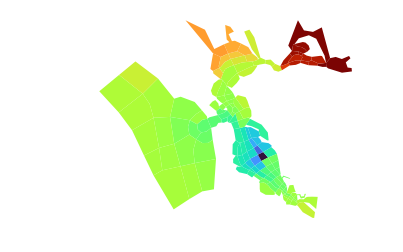

In [18]:
age=map_ds.AgeTr1.isel(time=-1,layer=0).values
plt.figure()
g.plot_cells(values=age,cmap=cmap)
plt.axis('equal')
plt.axis('off') 
;

In [72]:
from matplotlib.colors import LogNorm,Normalize
from matplotlib import cm

Initial Questions
--

1. Are there meaningful variations in age over time?  _Yes_
2. Does age reach steady state, at least for some cells, within the 80 day run? _No_

Follow-up:
--
3. There are some oscillations at roughly tidal or daily time scales.  Why?  This appears to occur in deep cells, and reflects tidal variability of the vertical mixing which has not been filtered out.

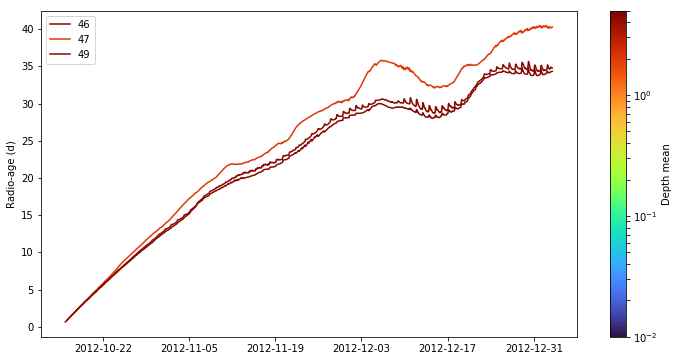

In [68]:
fig,ax=plt.subplots(1,1,figsize=(12,6))

#norm=LogNorm(vmin=1e-6,vmax=0.1)
norm=LogNorm(vmin=0.01,vmax=5)

for c in range(g.Ncells()):
    #if c%7: continue
    if c not in [46,47,49]: continue
    layer=1
    age=map_ds.AgeTr1.isel(layer=layer,face=c).values
    conc=map_ds.cTr1.isel(layer=layer,face=c).values
    depth=map_ds.LocalDepth.isel(layer=layer,face=c).values
    age=age.copy()
    age[conc<1e-8]=np.nan
    #color=cmap( norm(conc.mean()) )
    color=cmap( norm(depth.mean()) )
    ax.plot( map_ds.time.values, age,color=color,label=str(c))

sm=cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([0,1])
fig.colorbar( sm, label='Depth mean',ax=ax)
ax.set_ylabel('Radio-age (d)')
ax.legend()

(734850, 734857, 27, 31)

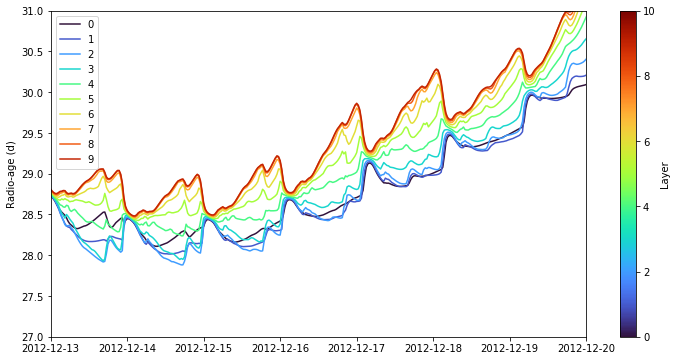

In [80]:
fig,ax=plt.subplots(1,1,figsize=(12,6))
c=46
norm=Normalize(vmin=0,vmax=10)

for layer in map_ds.layer.values:
    age=map_ds.AgeTr1.isel(layer=layer,face=c).values
    conc=map_ds.cTr1.isel(layer=layer,face=c).values
    age=age.copy()
    age[conc<1e-8]=np.nan
    color=cmap( norm(layer) )
    ax.plot( map_ds.time.values, age,color=color,label=str(layer))

sm=cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([0,1])
fig.colorbar( sm, label='Layer',ax=ax)
ax.set_ylabel('Radio-age (d)')
ax.legend()
ax.axis( xmin=734850,xmax=734857,ymin=27,ymax=31)

In [20]:
map_ds

<xarray.Dataset>
Dimensions:     (edge: 582, face: 141, layer: 10, maxnode_per_face: 15, node: 439, node_per_edge: 2, sub: 6, time: 3841)
Coordinates:
  * sub         (sub) object 'cTr1' 'dTr1' 'AgeTr1' 'LocalDepth' 'SURF' ...
  * time        (time) datetime64[ns] 2012-10-15 2012-10-15T00:30:00 ...
Dimensions without coordinates: edge, face, layer, maxnode_per_face, node, node_per_edge
Data variables:
    t_sec       (time) int32 ...
    cTr1        (time, layer, face) float64 ...
    dTr1        (time, layer, face) float64 ...
    AgeTr1      (time, layer, face) float64 ...
    LocalDepth  (time, layer, face) float64 ...
    SURF        (time, layer, face) float64 ...
    TotalDepth  (time, layer, face) float64 ...
    mesh        int64 ...
    node_x      (node) float64 ...
    node_y      (node) float64 ...
    face_node   (face, maxnode_per_face) int32 ...
    edge_node   (edge, node_per_edge) int32 ...
    bedlevel    (face) float32 ...
    eta         (time, face) float32 ...
   